# Загрузка данных

In [54]:
import pandas as pd
data = pd.read_csv('train.csv')
data.loc[0]['text']

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [55]:
texts = data['text']

texts = texts[:1000]

In [70]:
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [75]:
target = data['target'][:1000]

# Обработка данных

In [67]:
import spacy
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from spacy.lang.en import STOP_WORDS

stemmer = PorterStemmer()

nlp = spacy.load("en_core_web_sm")

stop_words = list(STOP_WORDS)

def preprocess_text(text):
  tokens = nlp(text)
  stemmed_lemmas = [stemmer.stem(token.lemma_) for token in tokens 
                    if token.text not in stop_words 
                    and token.pos_ != "PUNCT" and token.pos_ != "SPACE"] 
  processed_text = " ".join(stemmed_lemmas)

  return processed_text

In [65]:
processed_texts = list(map(preprocess_text, texts))

In [66]:
processed_texts

['our deed reason # earthquak may allah forgiv',
 'forest fire near la rong sask canada',
 'all resid ask shelter place notifi offic no evacu shelter place order expect',
 '13,000 peopl receiv # wildfir evacu order california',
 'just get send photo rubi # alaska smoke # wildfir pour school',
 '# rockyfir updat = > california hwi . 20 close direct lake counti fire # cafir # wildfir',
 '# flood # disast heavi rain caus flash flood street manit colorado spring area',
 'i hill i fire wood',
 'there emerg evacu happen build street',
 'i afraid tornado come area',
 'three peopl die heat wave far',
 'haha south tampa get flood hah- wait a second i live in south tampa what am i gonna do what am i gonna do fvck # flood',
 '# rain # flood # florida # tampabay # tampa 18 19 day i lose count',
 '# flood bago myanmar # we arriv bago',
 'damag school bu 80 multi car crash # break',
 'what man',
 'i love fruit',
 'summer love',
 'my car fast',
 'what goooooooaaaaaal',
 'ridicul',
 'london cool',
 'l

In [68]:
embeddings = [nlp(text).vector for text in processed_texts]

embeddings = np.array(embeddings)

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")


Точность модели: 0.74


### Точность обычной модели 0.74

# PCA

In [86]:
# Определение n_samples и n_features
n_samples = embeddings.shape[0]
n_features = embeddings.shape[1]
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}") 

n_samples: 1000
n_features: 96


### Находим лучшую n_components для PCA

In [92]:
for i in range(2, 96): 

    pca = PCA(n_components=i)
    reduced_embeddings_pca = pca.fit_transform(embeddings)

    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(reduced_embeddings_pca, target, test_size=0.2, random_state=42)

    model = LogisticRegression()

    model.fit(X_train_pca, y_train_pca)

    y_pred_pca = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test_pca, y_pred_pca)
    print(f"Точность модели {i}: {accuracy}")

Точность модели 2: 0.77
Точность модели 3: 0.765
Точность модели 4: 0.765
Точность модели 5: 0.77
Точность модели 6: 0.735
Точность модели 7: 0.745
Точность модели 8: 0.735
Точность модели 9: 0.735
Точность модели 10: 0.735
Точность модели 11: 0.73
Точность модели 12: 0.735
Точность модели 13: 0.735
Точность модели 14: 0.725
Точность модели 15: 0.73
Точность модели 16: 0.73
Точность модели 17: 0.72
Точность модели 18: 0.72
Точность модели 19: 0.725
Точность модели 20: 0.72
Точность модели 21: 0.745
Точность модели 22: 0.73
Точность модели 23: 0.775
Точность модели 24: 0.78
Точность модели 25: 0.765
Точность модели 26: 0.76
Точность модели 27: 0.76
Точность модели 28: 0.77
Точность модели 29: 0.755
Точность модели 30: 0.765
Точность модели 31: 0.77
Точность модели 32: 0.775
Точность модели 33: 0.765
Точность модели 34: 0.765
Точность модели 35: 0.77
Точность модели 36: 0.775
Точность модели 37: 0.775
Точность модели 38: 0.79
Точность модели 39: 0.785
Точность модели 40: 0.78
Точность мо

## Самая лучшая - Точность модели 38: 0.79


Точность модели: 0.79


(1000, 38)

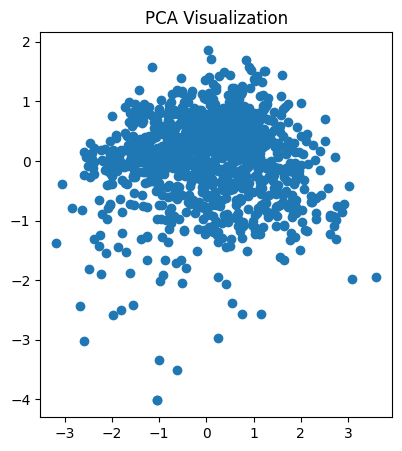

In [94]:
pca = PCA(n_components=38)
reduced_embeddings_pca = pca.fit_transform(embeddings)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(reduced_embeddings_pca, target, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train_pca, y_train_pca)

y_pred_pca = model.predict(X_test_pca)

accuracy = accuracy_score(y_test_pca, y_pred_pca)
print(f"Точность модели: {accuracy}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1])
plt.title("PCA Visualization")
reduced_embeddings_pca.shape

# T-SNE

### Диапазон perplexity от 5 до 50. Делаю перебор

по умолчанию не позволяет задать n_components выше 3, если используется алгоритм barnes_hut

Варианты:      

Изменить алгоритм:      

Вы можете использовать другой алгоритм TSNE, например, 'exact' (более точный, но медленный) или 'fft' (быстрее, но менее точный).
Эти алгоритмы не ограничены 3-мя компонентами.

Увеличить n_components с помощью PCA:       


Сначала используйте PCA для снижения размерности до более высокого числа n_components.
Затем примените TSNE с n_components=3, чтобы получить окончательное снижение размерности до 3-х компонент.

In [104]:
for i_n in range(2,4):
    for i_p in range(5,51):
        tsne = TSNE(n_components=i_n, perplexity=i_p)
        reduced_embeddings_tsne = tsne.fit_transform(embeddings)

        X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(reduced_embeddings_tsne, target, test_size=0.2, random_state=42)

        model = LogisticRegression()

        model.fit(X_train_tsne, y_train_tsne)

        y_pred_tsne = model.predict(X_test_tsne)

        accuracy = accuracy_score(y_test_tsne, y_pred_tsne)
        print(f"Точность модели {i_n} и {i_p}: {accuracy}")



Точность модели 2 и 5: 0.77
Точность модели 2 и 6: 0.765
Точность модели 2 и 7: 0.765
Точность модели 2 и 8: 0.76
Точность модели 2 и 9: 0.735
Точность модели 2 и 10: 0.755
Точность модели 2 и 11: 0.775
Точность модели 2 и 12: 0.775
Точность модели 2 и 13: 0.75
Точность модели 2 и 14: 0.785
Точность модели 2 и 15: 0.76
Точность модели 2 и 16: 0.755
Точность модели 2 и 17: 0.76
Точность модели 2 и 18: 0.765
Точность модели 2 и 19: 0.75
Точность модели 2 и 20: 0.72
Точность модели 2 и 21: 0.755
Точность модели 2 и 22: 0.75
Точность модели 2 и 23: 0.78
Точность модели 2 и 24: 0.76
Точность модели 2 и 25: 0.755
Точность модели 2 и 26: 0.745
Точность модели 2 и 27: 0.725
Точность модели 2 и 28: 0.725
Точность модели 2 и 29: 0.74
Точность модели 2 и 30: 0.745
Точность модели 2 и 31: 0.74
Точность модели 2 и 32: 0.745
Точность модели 2 и 33: 0.785
Точность модели 2 и 34: 0.735
Точность модели 2 и 35: 0.735
Точность модели 2 и 36: 0.75
Точность модели 2 и 37: 0.73
Точность модели 2 и 38: 0.735

## Лучшая модель Точность модели 2 и 14: 0.785

In [106]:
tsne = TSNE(n_components=2, perplexity=14)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(reduced_embeddings_tsne, target, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train_tsne, y_train_tsne)

y_pred_tsne = model.predict(X_test_tsne)

accuracy = accuracy_score(y_test_tsne, y_pred_tsne)
print(f"Точность модели {2} и {14}: {accuracy}")

Точность модели 2 и 14: 0.75


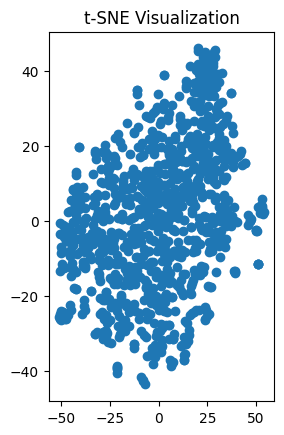

In [107]:
plt.subplot(1, 2, 2)
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1])
plt.title("t-SNE Visualization")
plt.show()